# Performance comparison of weight Optimizers
This notebook aims to compare the performance of the most common optimizers for training neural networks. They are:
1. Stochastic Gradient Descent (SGD)
2. Momentum:
3. Adam (Adaptive Moment Estimation):
4. RMSProp (Root Mean Square Propagation):
5. AdaGrad (Adaptive Gradient Algorithm):

# Defining a sample neural network architecture

Training with SGD optimizer...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - accuracy: 0.7089 - loss: 1.0686 - val_accuracy: 0.9108 - val_loss: 0.3180
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.9128 - loss: 0.3088 - val_accuracy: 0.9300 - val_loss: 0.2479
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.9284 - loss: 0.2479 - val_accuracy: 0.9384 - val_loss: 0.2134
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.9381 - loss: 0.2131 - val_accuracy: 0.9449 - val_loss: 0.1910
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.9476 - loss: 0.1813 - val_accuracy: 0.9509 - val_loss: 0.1673
Training with Momentum optimizer...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - accuracy: 0.8418 - loss: 0.5202 - val_accuracy: 0.9540 - val_loss: 0.1467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9614 - loss: 0.1294 - val_accuracy: 0.9674 - val_loss: 0.1033
Epoch 3/5
1875/1

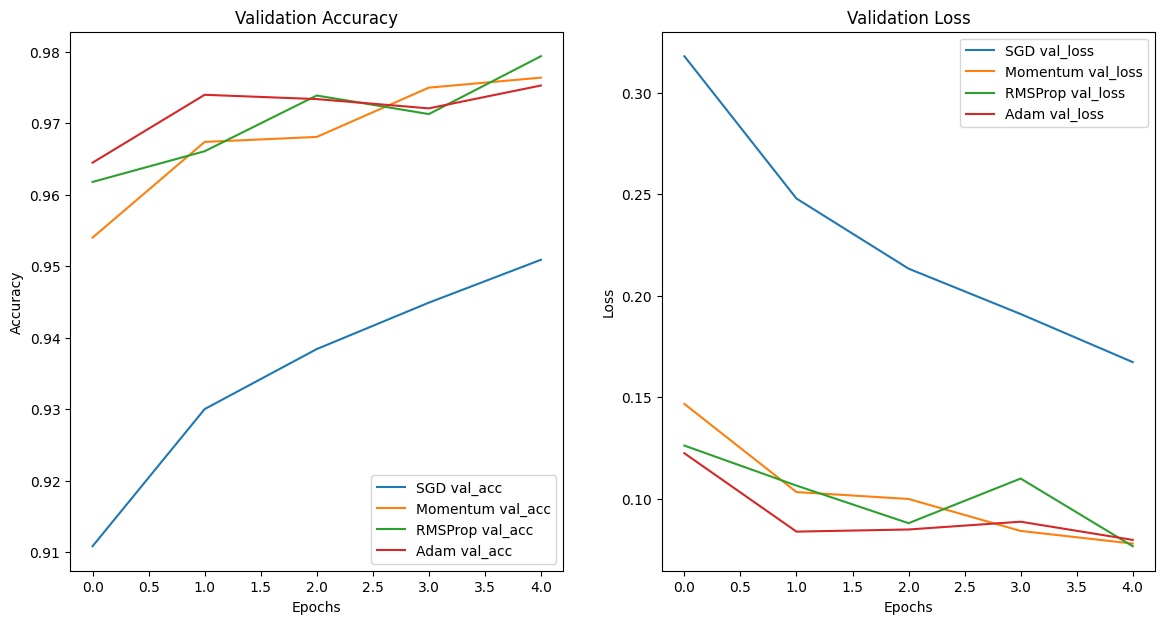

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define a simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# List of optimizers to compare
optimizers = {
    'SGD': SGD(),
    'Momentum': SGD(momentum=0.9),
    'RMSProp': RMSprop(),
    'Adam': Adam()
}

results = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)
    results[name] = history

plt.figure(figsize=(14, 7))

# Plotting accuracy
plt.subplot(1, 2, 1)
for name, history in results.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} val_acc')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
for name, history in results.items():
    plt.plot(history.history['val_loss'], label=f'{name} val_loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
